### Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###  Loading dataset head

In [55]:
data = pd.read_csv('Cdata.csv')
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### Exploring th data

In [56]:
data.shape
data.info()

print("\nClass Ditribution:")
print(data['Depression'].value_counts())
print(data['Depression'].value_counts(normalize=True).map(lambda x: f"{x:.2%}"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

### Data preprocessing

In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = data.copy()

if df.isnull().sum().any():
    df = df.dropna()    

df = df.drop('id', axis=1)

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'].values)
df['Family History of Mental Illness'] = label_encoder.fit_transform(df['Family History of Mental Illness'].values)

categorical_col = ['City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?']
df_encoded = pd.get_dummies(df, columns=categorical_col, drop_first=True)

df_encoded.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Family History of Mental Illness,...,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes
0,1,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,0,...,False,False,False,False,False,False,False,False,False,True
1,0,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,1,...,False,False,False,False,False,False,False,False,False,False
2,1,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,1,...,False,False,False,False,False,False,False,False,False,False
3,0,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,...,False,False,False,False,False,False,False,False,False,True
4,0,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,...,False,False,False,False,False,False,False,False,False,True


### Exploring Relation through Graphs

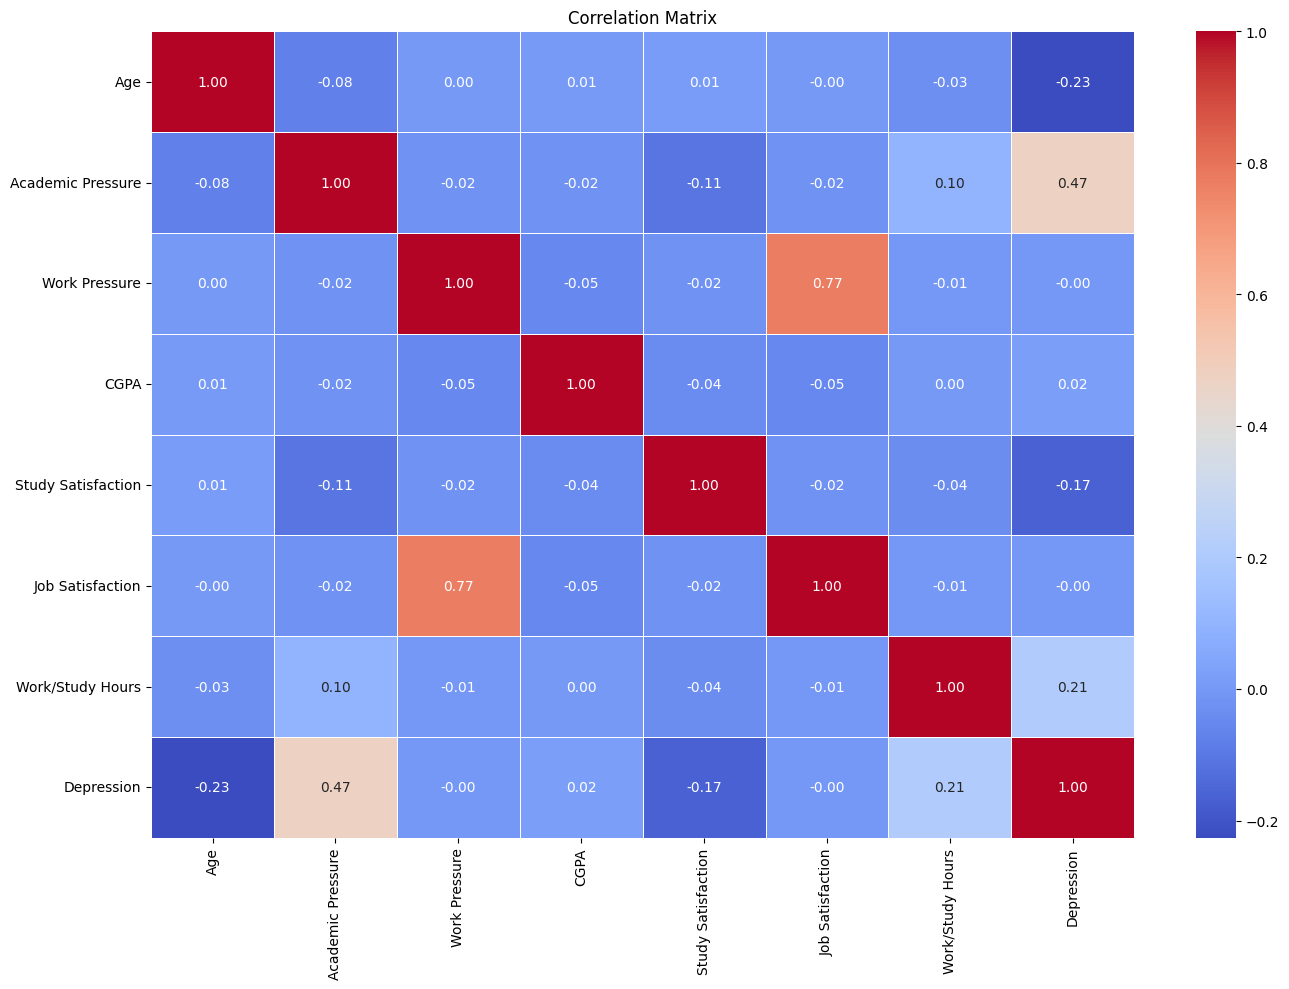

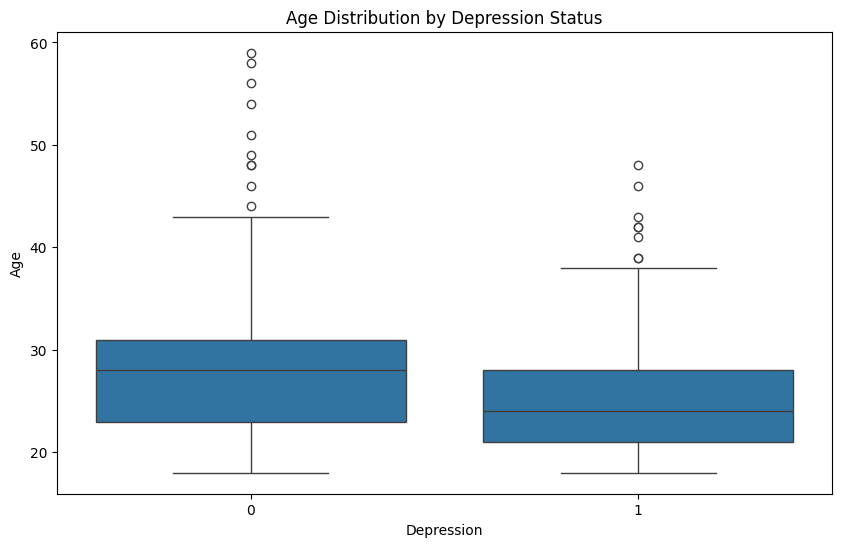

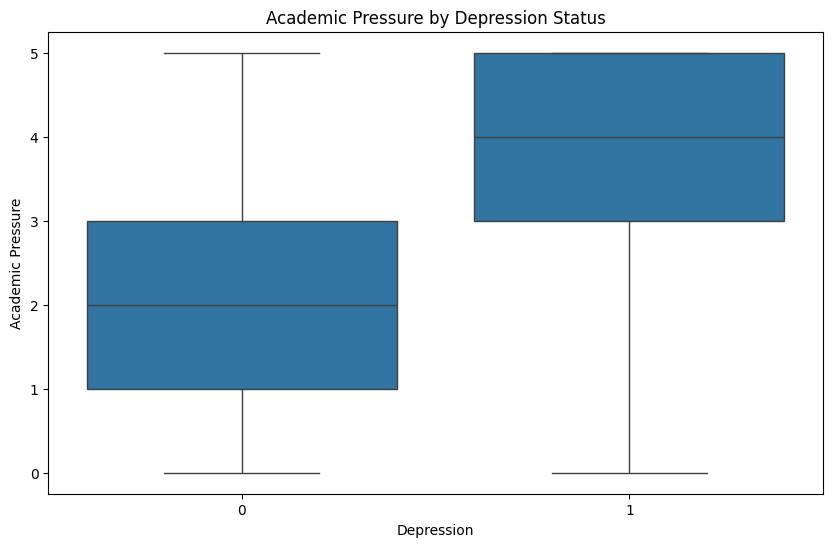

<Figure size 1200x600 with 0 Axes>

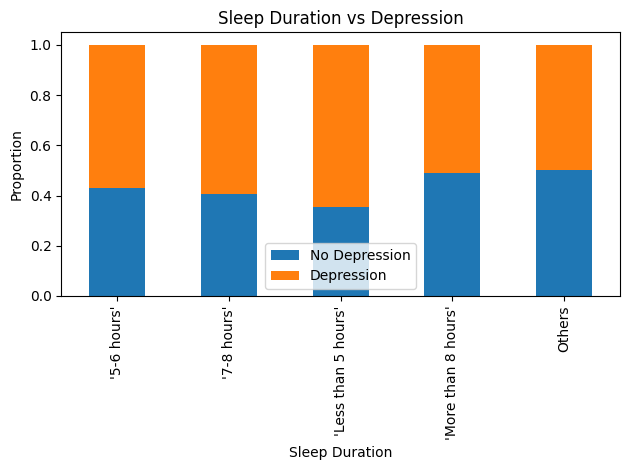

In [58]:
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
correlation = df_encoded[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression', y='Age', data=df_encoded)
plt.title('Age Distribution by Depression Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression', y='Academic Pressure', data=df_encoded)
plt.title('Academic Pressure by Depression Status')
plt.show()

sleep_categories = data['Sleep Duration'].unique()
sleep_counts = data.groupby(['Sleep Duration', 'Depression']).size().unstack(fill_value=0)
sleep_counts_normalized = sleep_counts.div(sleep_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
sleep_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Duration')
plt.ylabel('Proportion')
plt.legend(['No Depression', 'Depression'])
plt.tight_layout()
plt.show()

### Splitting Data into Training and Testing 

In [59]:
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

print("Checking for non-numeric columns...")
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
if len(non_numeric_cols) > 0:
    print(f"Found non-numeric columns: {non_numeric_cols}")
    print("Converting or removing these columns...")
    
    X = X.drop(columns=non_numeric_cols)
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and scaled!")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

Checking for non-numeric columns...
Found non-numeric columns: Index(['Financial Stress', 'City_'Less than 5 Kalyan'', 'City_3.0',
       'City_Agra', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhavna',
       'City_Bhopal', 'City_Chennai', 'City_City', 'City_Delhi',
       'City_Faridabad', 'City_Gaurav', 'City_Ghaziabad', 'City_Harsh',
       'City_Harsha', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Khaziabad', 'City_Kibara',
       'City_Kolkata', 'City_Lucknow', 'City_Ludhiana', 'City_M.Com',
       'City_M.Tech', 'City_ME', 'City_Meerut', 'City_Mihir', 'City_Mira',
       'City_Mumbai', 'City_Nagpur', 'City_Nalini', 'City_Nalyan',
       'City_Nandini', 'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot',
       'City_Rashi', 'City_Reyansh', 'City_Saanvi', 'City_Srinagar',
       'City_Surat', 'City_Thane', 'City_Vaanya', 'City_Vadodara',
       'City_Varanasi', 'City_Vasai-Virar', 'City_Visakhapatnam',
       'Profession_'Content

### Classification Model for the Dataset

In [60]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

### Evaluating the Model

Accuracy: 0.7287

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2343
           1       0.76      0.78      0.77      3238

    accuracy                           0.73      5581
   macro avg       0.72      0.72      0.72      5581
weighted avg       0.73      0.73      0.73      5581



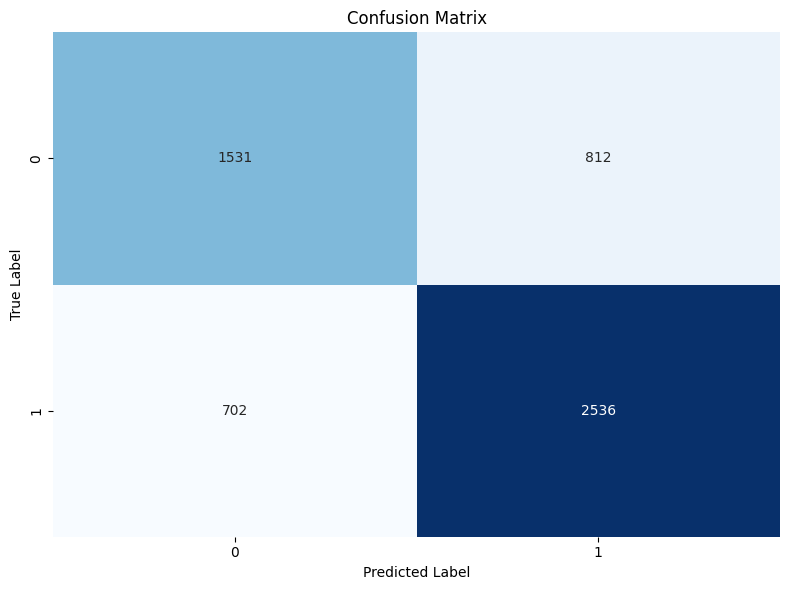

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()